In [1]:
import mne
mne.set_log_level('WARNING')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import pickle
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['#134f5cff', '#0097a7ff', '#ffab40ff', 'y'])))#03bccf

In [2]:
bands = ['d','th','a','b','g','hg']

In [3]:
sig_t_dic = pickle.load(open('Figure-S9/reviewers-short-baseline_sig_chs_all_bands_tap-t_v3.pkl','rb'))
sig_plz_dic = pickle.load(open('Figure-S9/reviewers-short-baseline_sig_chs_all_bands_plural-z_v3.pkl','rb'))
sig_psd_dic = pickle.load(open('Figure-S9/reviewers-short-baseline_sig_chs_all_bands_past-d_v3.pkl','rb'))
dics = [sig_t_dic, sig_plz_dic, sig_psd_dic]

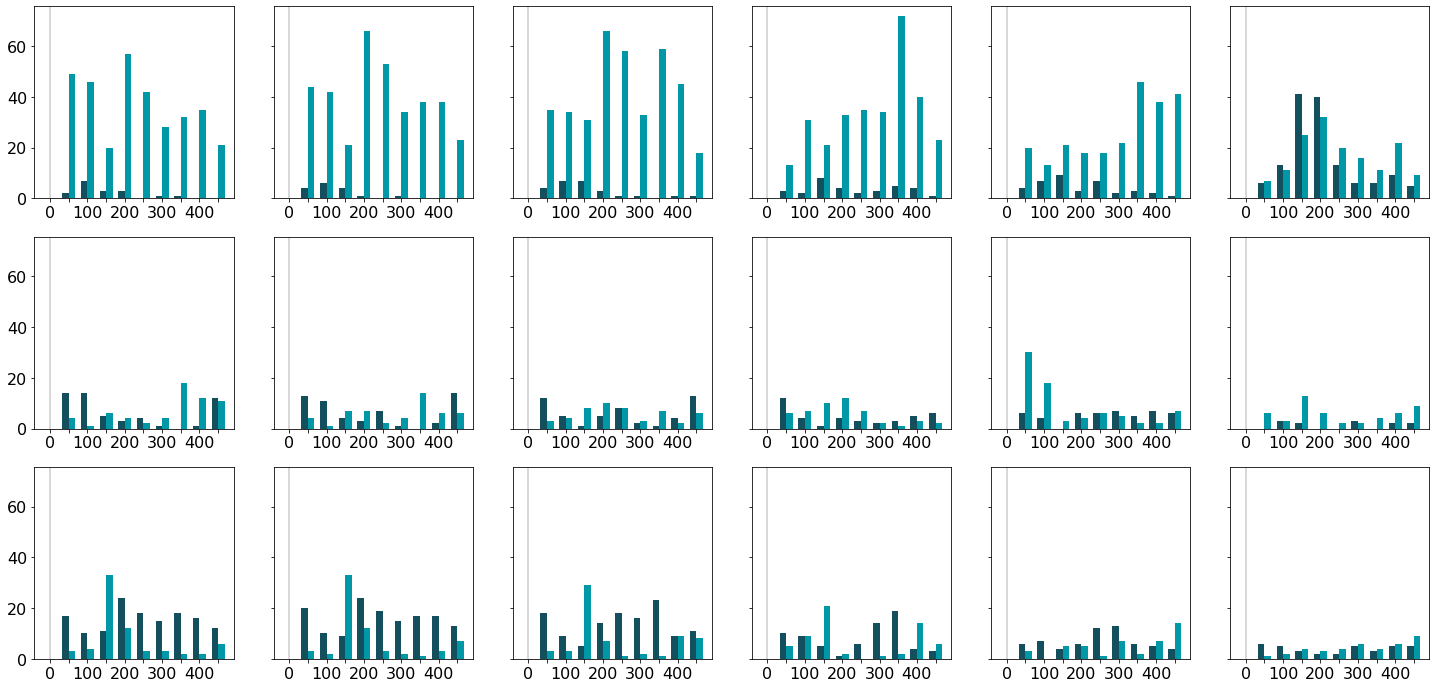

In [4]:
width = 0.35
labels = ['0', '50', '100', '150', '200','250','300','350','400','450']
xlabels = ['0', '', '100', '', '200', '', '300', '', '400', '']
ind = np.arange(len(labels))

fig, ax = plt.subplots(3,6,sharey=True, figsize=(25,12))
for bidx, band in enumerate(bands):
    for cidx, comp in enumerate(dics):
        surface_sum = np.sum([comp[band]['sig_etics'][subj][ch][10:20] for subj in comp[band]['sig_etics'].keys() for ch in comp[band]['sig_etics'][subj]], axis=0)
        underlying_sum = np.sum([comp[band]['sig_ology'][subj][ch][10:20] for subj in comp[band]['sig_ology'].keys() for ch in comp[band]['sig_ology'][subj]], axis=0)
        #print(band, surface_sum, underlying_sum)

        ax[cidx][bidx].bar(ind-(0.5*width), surface_sum[:], width, label='surface pattern sites')
        ax[cidx][bidx].bar(ind+(0.5*width), underlying_sum[:], width, label='underlying pattern sites')
        ax[cidx][bidx].axvline(0, c='grey', alpha=0.4)
        ax[cidx][bidx].set_xticks(ind)
        ax[cidx][bidx].set_xticklabels(xlabels)
plt.show()